import needed packages

In [42]:
import pandas as pd #for work with Data
import matplotlib.pyplot as plt  #for plotting
from sklearn.model_selection import train_test_split  #for splitting
import numpy as np  #for mathematical works
from scipy.optimize import curve_fit  #for fitting functions
import time #for capturing time

Read Data from CSV file

In [43]:
# Read csv data with pandas lib
data  = pd.read_csv('/content/FinalDataset.csv')
# get informatiom from data by #data.describe()

# separating input arrays from outputs
X = data[['radius','nu']].values

**Visualize** data

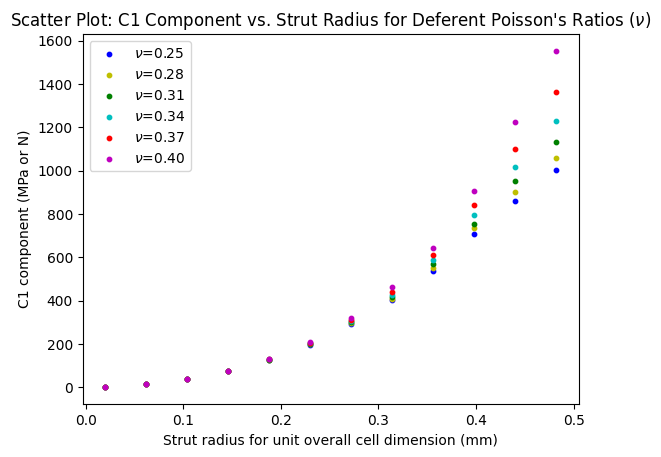

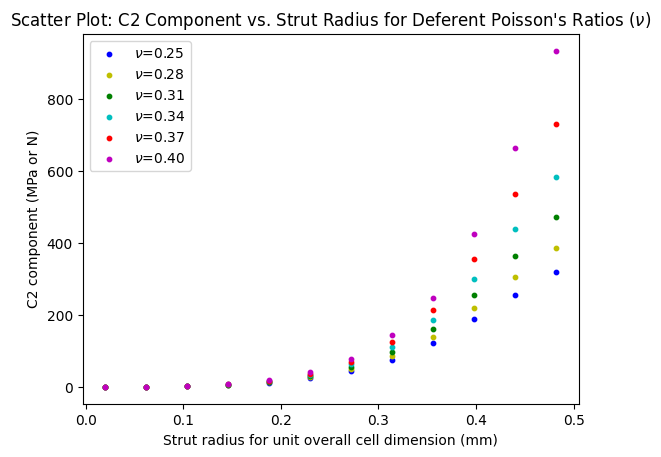

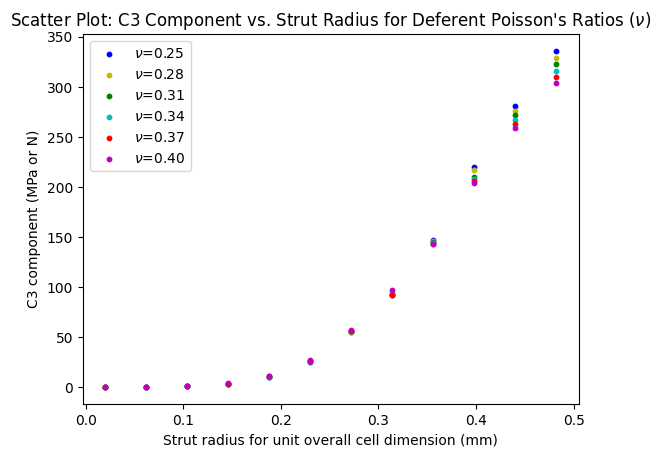

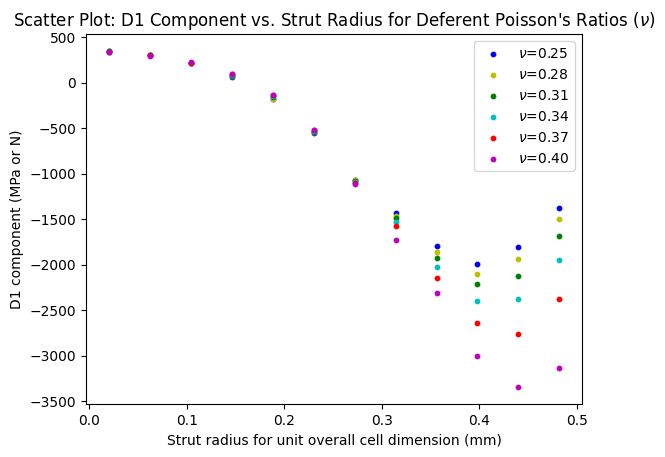

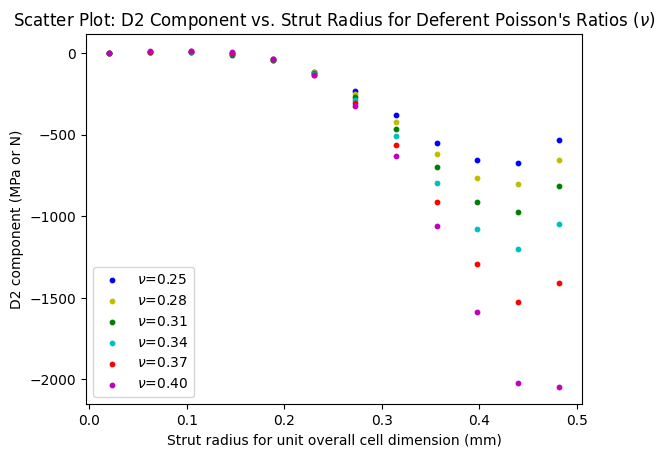

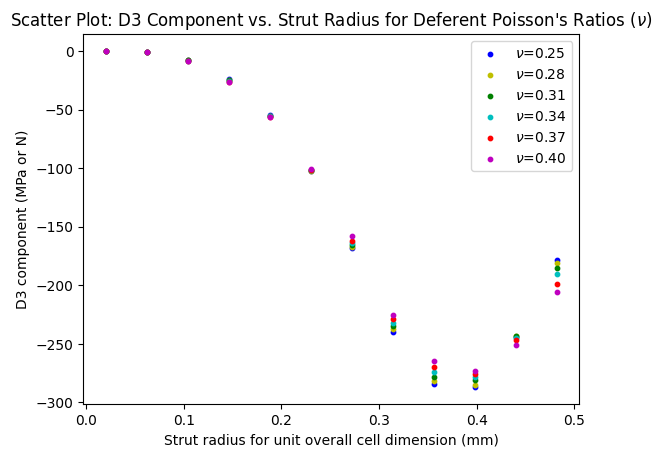

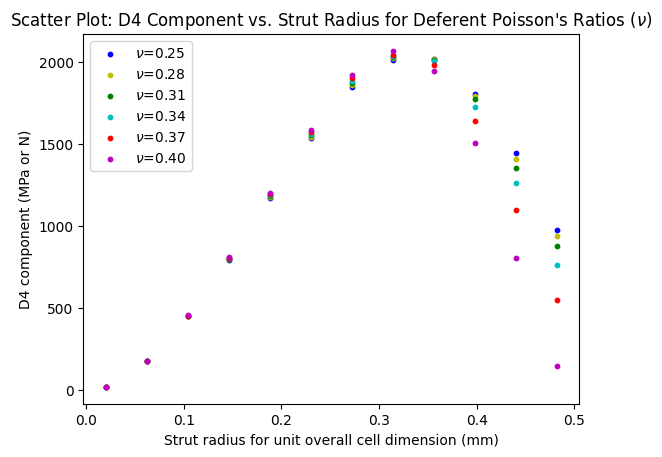

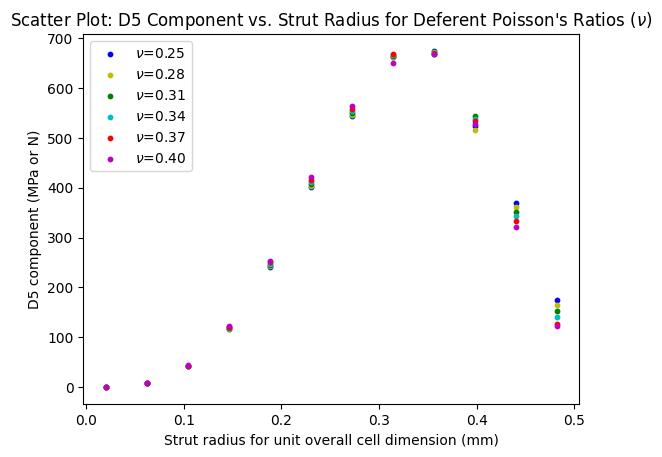

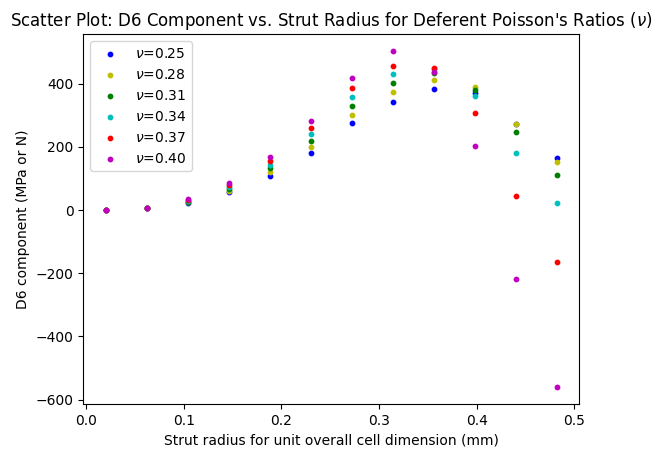

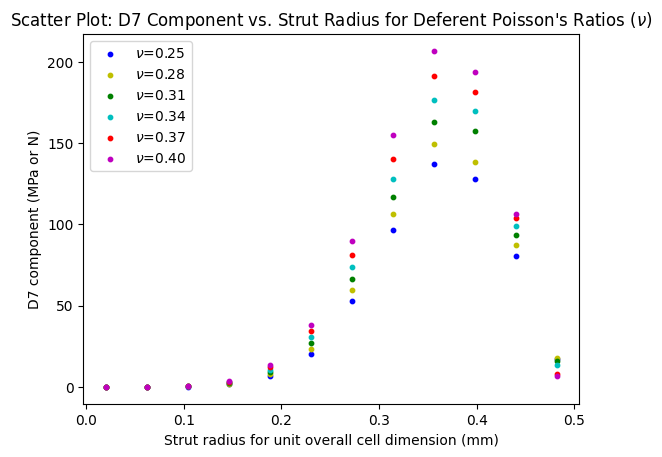

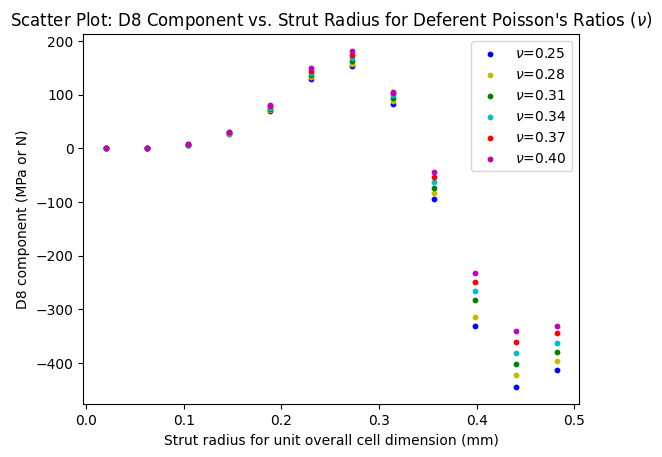

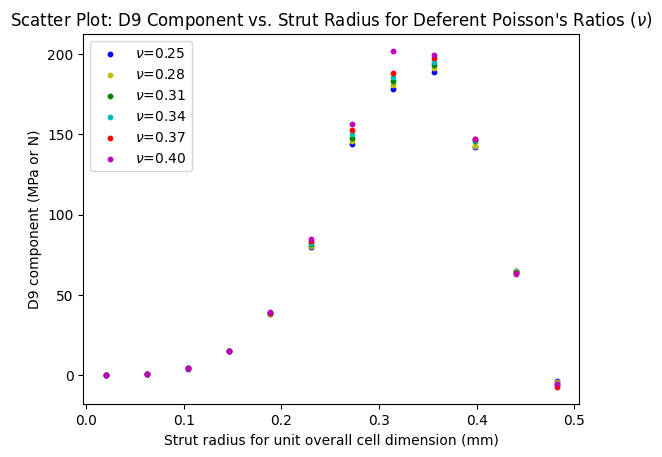

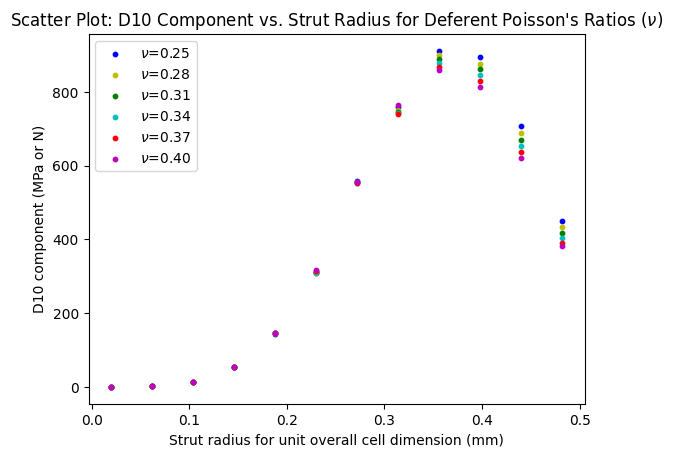

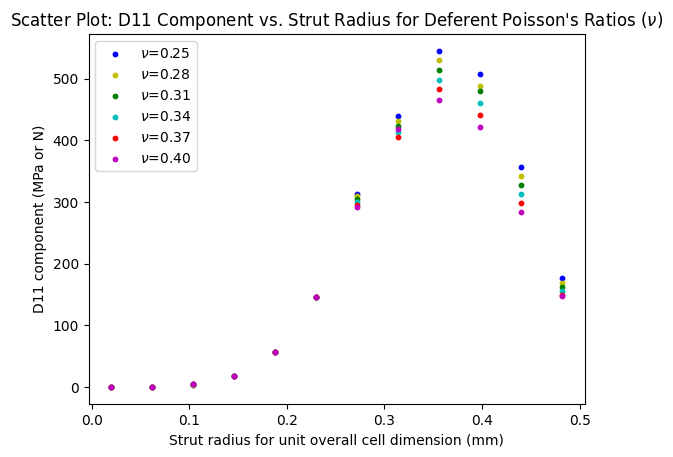

In [44]:
data1 = data[data['nu']==0.25] # separating data based on their Poisson's ratio
data2 = data[data['nu']==0.28]
data3 = data[data['nu']==0.31]
data4 = data[data['nu']==0.34]
data5 = data[data['nu']==0.37]
data6 = data[data['nu']==0.40]
for i in [['C1'],['C2'],['C3'],['D1'],['D2'],['D3'],['D4'],['D5'],['D6'],['D7'],['D8'],['D9'],['D10'],['D11']]:
    fig = plt.figure()
    myplot = fig.add_subplot(111)
    X1 = data1[['radius']].values/10
    y1 = data1[i].values
    X2 = data2[['radius']].values/10
    y2 = data2[i].values
    X3 = data3[['radius']].values/10
    y3 = data3[i].values
    X4 = data4[['radius']].values/10
    y4 = data4[i].values
    X5 = data5[['radius']].values/10
    y5 = data5[i].values
    X6 = data6[['radius']].values/10
    y6 = data6[i].values
    myplot.scatter(X1, y1, s=10, color='b',label='$ν$=0.25')
    myplot.scatter(X2, y2, s=10, color='y',label='$ν$=0.28')
    myplot.scatter(X3, y3, s=10, color='g',label='$ν$=0.31')
    myplot.scatter(X4, y4, s=10, color='c',label='$ν$=0.34')
    myplot.scatter(X5, y5, s=10, color='r',label='$ν$=0.37')
    myplot.scatter(X6, y6, s=10, color='m',label='$ν$=0.40')
    plt.xlabel("Strut radius for unit overall cell dimension (mm)")
    plt.ylabel("%s component (MPa or N)" % (i[0]))
    # plt.ylabel("$C_1$ component (MPa)") #for getting output
    plt.legend()
    plt.title("Scatter Plot: %s Component vs. Strut Radius for Deferent Poisson's Ratios ($ν$)" % (i[0]))
    # plt.title("Scatter Plot: $C_1$ Component vs. Strut Radius for Deferent Poisson's Ratios ($ν$)") #for getting output
    # plt.savefig('C1SPlot.svg', bbox_inches='tight') #for getting output

Find best model for each output and train it

In [45]:
#useful functions
def AveList(mylist):
    return sum(mylist)/len(mylist)

def ErrorListCreator(ErrorList, realvaluelist, predvaluelist):
    for k in range(len(realvaluelist)):
        ErrorList.append(abs((realvaluelist[k]-predvaluelist[k])/realvaluelist[k]*100))

In [46]:
def mymodel(X, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
            a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
            a21, a22, a23, a24, a25, a26, a27, a28, a29, a30,
            a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
            a41, a42, a43, a44, a45, a46, a47, a48, a49, a50,
            a51, a52, a53, a54, a55, a56): #scipy.curve_fit does not support *args directly
    #The number of func parameters here must not exceed the number of data points (train data)
    # , a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71
    x, y = X
    coefficients = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
                    a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                    a21, a22, a23, a24, a25, a26, a27, a28, a29, a30,
                    a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                    a41, a42, a43, a44, a45, a46, a47, a48, a49, a50,
                    a51, a52, a53, a54, a55, a56]

    result = 0
    index = 0
    for i in range(0, q):  # x^i terms up to x^q-1
        for j in range(0, p):  # y^j terms up to y^p-1
            result += coefficients[index] * x**i * y**j
            index += 1

    return result  # xqyp

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['C1']
polynomial order for r is 6 and for nu is 2
the error for random group of 2 on the test data is 0.376139
12.23824429512024 seconds


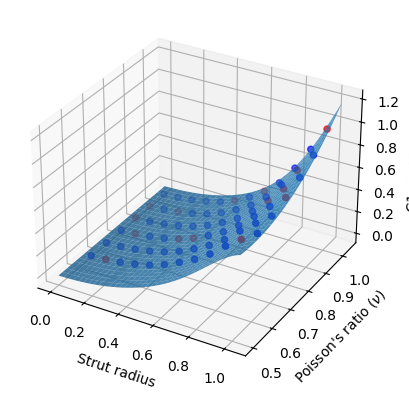

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['C2']
polynomial order for r is 7 and for nu is 2
the error for random group of 2 on the test data is 0.783711
12.892549514770508 seconds


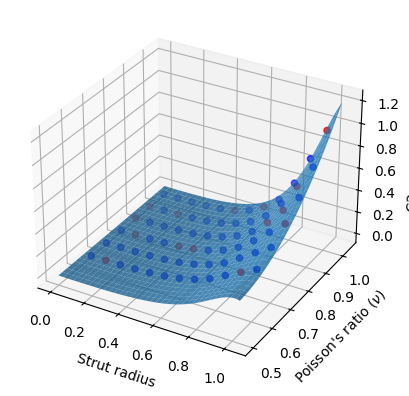

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['C3']
polynomial order for r is 8 and for nu is 1
the error for random group of 2 on the test data is 0.954656
15.76497507095337 seconds


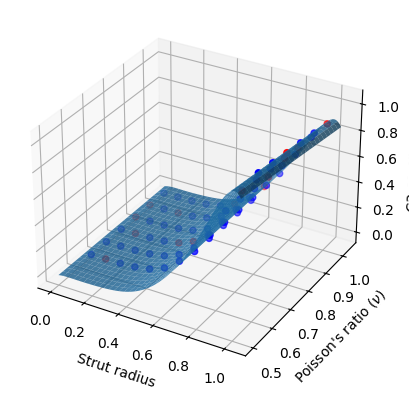

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D1']
polynomial order for r is 6 and for nu is 2
the error for random group of 2 on the test data is 1.152619
13.634210586547852 seconds


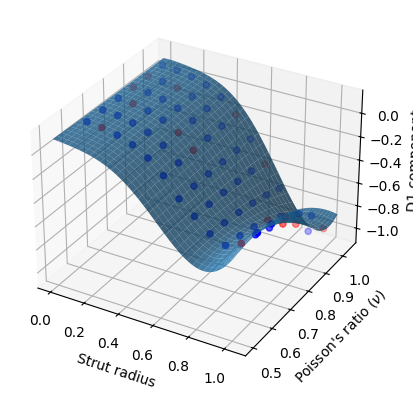

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D2']
polynomial order for r is 7 and for nu is 2
the error for random group of 3 on the test data is 1.209231
12.69379711151123 seconds


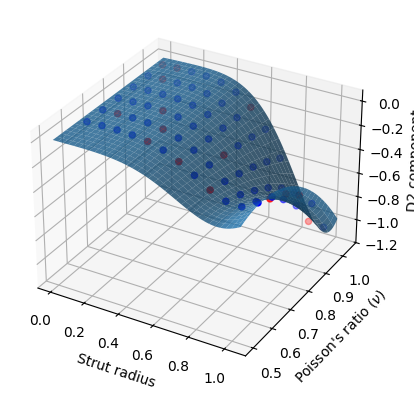

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D3']
polynomial order for r is 8 and for nu is 2
the error for random group of 1 on the test data is 0.544845
13.432525396347046 seconds


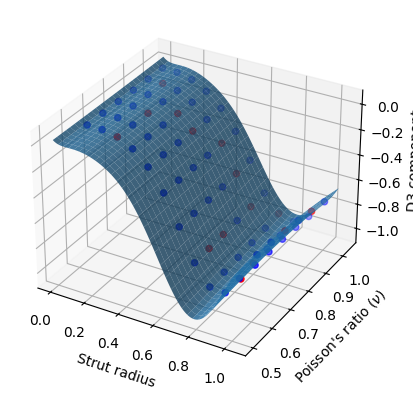

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D4']
polynomial order for r is 6 and for nu is 3
the error for random group of 1 on the test data is 0.576562
13.469826221466064 seconds


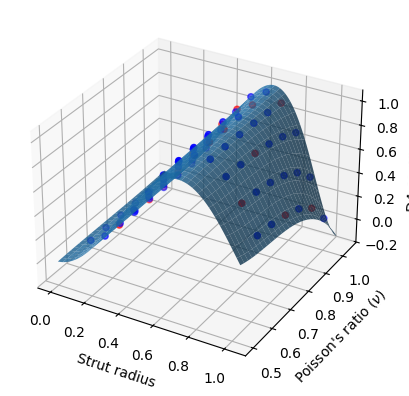

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D5']
polynomial order for r is 8 and for nu is 1
the error for random group of 3 on the test data is 0.802991
13.217316627502441 seconds


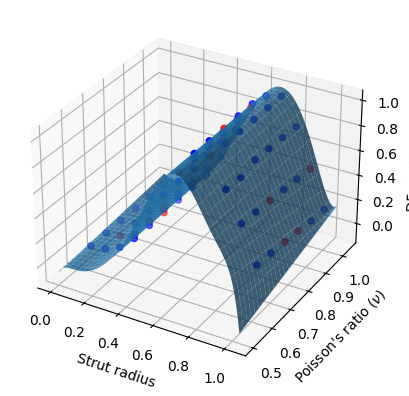

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D6']
polynomial order for r is 8 and for nu is 3
the error for random group of 2 on the test data is 3.421051
13.959938287734985 seconds


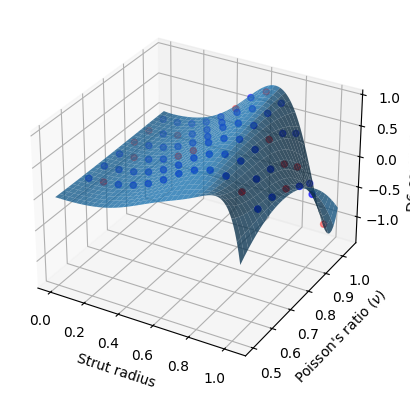

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D7']
polynomial order for r is 7 and for nu is 1
the error for random group of 1 on the test data is 3.006627
20.852360725402832 seconds


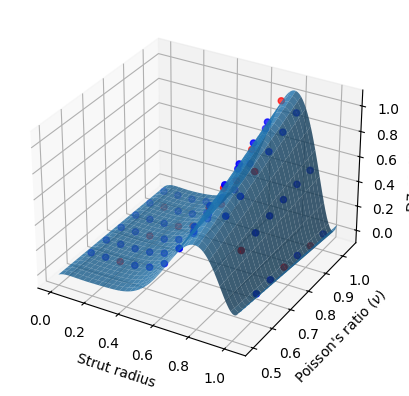

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D8']
polynomial order for r is 8 and for nu is 1
the error for random group of 1 on the test data is 1.050905
14.378972053527832 seconds


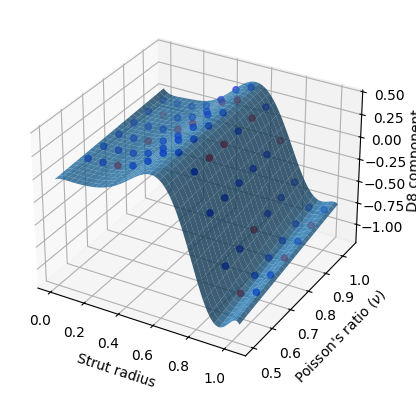

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D9']
polynomial order for r is 8 and for nu is 2
the error for random group of 3 on the test data is 2.884853
15.12054705619812 seconds


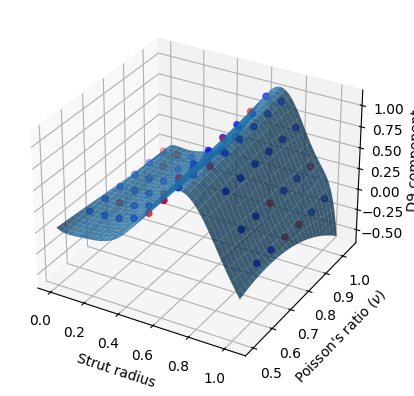

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D10']
polynomial order for r is 8 and for nu is 1
the error for random group of 2 on the test data is 0.616101
17.578423023223877 seconds


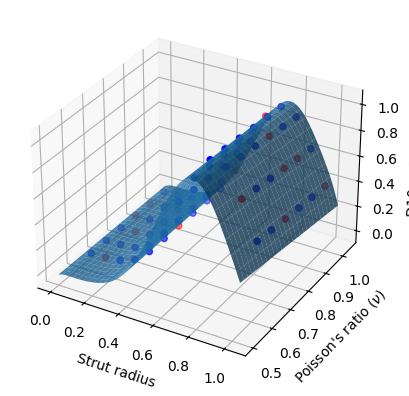

<ipython-input-47-9754bb86a660>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)
<ipython-input-47-9754bb86a660>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))


for ['D11']
polynomial order for r is 8 and for nu is 1
the error for random group of 2 on the test data is 0.840855
22.28088068962097 seconds


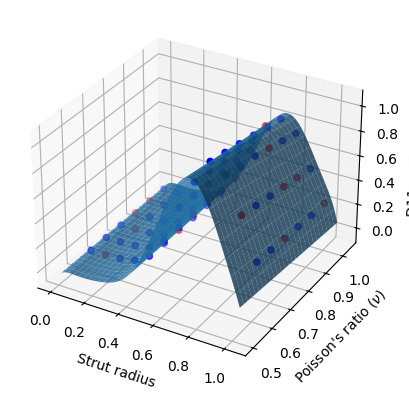

Whole time is  217.72712230682373  seconds


In [47]:
AllofFinalModelsCoefs={} #a dict for storing final coefficients
AllofFinalModelsOrders={} #a dict for storing final orders
Start = time.time() #for capturing time

for j in [['C1'],['C2'],['C3'],['D1'],['D2'],['D3'],['D4'],['D5'],['D6'],['D7'],['D8'],['D9'],['D10'],['D11']]: #for different outputs
    FinalErrorsDoc={} #min errors for all models for documantory
    y = data[j].values
    StartEach = time.time() #for capturing time for each output

    #find best model(best polynomial orders for r and nu that create the lowest error on the test data)
    for q in range(1,10): #max power allowed for r (+2)   ##
        for p in range(1,7): #max power allowed for nu (+2)    ##
            TotalError = [] #mean error for each model

            for i in range(1,4): #find best model for different random groups

                #split train and test data
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

                #normalization
                Radius = X_train[:,0]/max(X[:,0])
                Poisson = X_train[:,1]/max(X[:,1])
                Output = y_train/max(abs(y))  #D may have negative values

                #specify wights of training
                sigma = [] #weights
                for m in range(len(y_train)):
                    sigma.append(Output[m].item())

                #train model
                popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)

                #test model
                a=(X_test[:,0]/max(X[:,0]),X_test[:,1]/max(X[:,1])) #Normalization of test data
                pred_y=mymodel(a, *popt)
                Mypred = pred_y*max(abs(y))  #because of normalization

                ErrorList=[] #errors for test data in each random
                ErrorListCreator(ErrorList, y_test, Mypred)
                TotalError.append(AveList(ErrorList))
            FinalErrorsDoc[(q,p)] = [AveList(TotalError), TotalError.index(min(TotalError))+1]

    #tarining for the best model, and best random group, found in the previous loop
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=min(FinalErrorsDoc.values())[1]) #the random group that had the lowest error on the test data

    #normalization
    Radius = X_train[:,0]/max(X[:,0])
    Poisson = X_train[:,1]/max(X[:,1])
    Output = y_train/max(abs(y))

    #specify wights of training
    sigma = [] #weights
    for m in range(len(y_train)):
        sigma.append(Output[m].item())

    [(q,p)]=[key for key, val in FinalErrorsDoc.items() if val == min(FinalErrorsDoc.values())] # find q-1 , p-1 that create the best model
    #train model
    popt, pcov = curve_fit(mymodel, (Radius, Poisson) , Output.reshape(len(y_train),), sigma=sigma, maxfev=500000)

    #test model
    a=(X_test[:,0]/max(X[:,0]),X_test[:,1]/max(X[:,1])) #Normalization of test data
    pred_y=mymodel(a, *popt)
    Mypred = pred_y*max(abs(y))  #because of normalization

    ErrorList=[] #errors for test data in each random
    ErrorListCreator(ErrorList, y_test, Mypred)

    #for showing in command line
    print('for', str(j))
    AllofFinalModelsOrders[j[0]] = (q,p)
    AllofFinalModelsCoefs[j[0]] =  popt
    print('polynomial order for r is %i and for nu is %i'% (q-1, p-1))
    print('the error for random group of %i on the test data is %f' %(min(FinalErrorsDoc.values())[1], AveList(ErrorList)))
    EndEach = time.time()
    print((EndEach - StartEach), 'seconds') #time passed for each output

    #plot for each output
    fig = plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[:,0]/max(X[:,0]), X_train[:,1]/max(X[:,1]), y_train[:,0]/max(abs(y)), color='b',label='train')
    ax.scatter(X_test[:,0]/max(X[:,0]), X_test[:,1]/max(X[:,1]), y_test[:,0]/max(abs(y)), color='r',label='test')
    ax.set_xlabel('Strut radius')
    ax.set_ylabel("Poisson's ratio ($ν$)")
    ax.set_zlabel("%s component" % (j[0]))
    # ax.set_zlabel("$D_6$ component" ) #for getting output

    R_data = np.arange(0.0, 1.05, 0.01)
    v_data = np.arange(0.5, 1.05, 0.01)
    R_plot, v_plot = np.meshgrid(R_data, v_data)
    yy = mymodel((R_data, v_plot), *AllofFinalModelsCoefs[j[0]])
    surf = ax.plot_surface(R_plot, v_plot, yy, alpha=0.8)
    # plt.savefig('D6Surf.svg', bbox_inches='tight', pad_inches=0.23) #for getting output
    plt.show()


#storing final orders and coefs
df = pd.DataFrame.from_dict(AllofFinalModelsOrders)
df.to_csv("AllofFinalModelsOrders.csv")
df = pd.DataFrame.from_dict(AllofFinalModelsCoefs)
df.to_csv("AllofFinalModelsCoefs.csv")

End = time.time()
print('Whole time is ',(End - Start), ' seconds')

Verification of the Final Model

In [48]:
#for verification
u=1
if u==1:
    StrutRadius = 1.
    CubeLength = 2.5
    PoissonRatio = 0.33
    YoungModulus = 3500
    RealValues = [2759.98156336,1011.96034232,737.50389964,-508.83947456,-224.59397891,-60.62648698,377.37064206,116.77955493,79.38182408,35.89215005,-61.14394571,31.342029,184.98005115,100.64198421]

if u==2:
    StrutRadius = 0.6
    CubeLength = 5.
    PoissonRatio = 0.27
    YoungModulus = 45000
    RealValues = [2193.53579609,130.70070969,63.24919856,1856.93992609,30.06459097,-142.76989051,6483.69458235,732.26643836,390.43376759,6.94229681,138.27893268,79.74392016,276.97800959,81.65837713]

if u==3:
    StrutRadius = 3.7
    CubeLength = 20.
    PoissonRatio = 0.4
    YoungModulus = 1580
    RealValues = [198.96345513,28.55970424,15.73444301,-717.70525567,-192.19664122,-340.78441544,7412.2343432,1533.14157806,1024.62726024,77.72923841,484.65017641,234.59477311,877.28521269,336.41356036]


test_r, test_v = StrutRadius/CubeLength*10, PoissonRatio
a=(test_r/max(X[:,0]),test_v/max(X[:,1])) #normalization

PredictedValues = []

for j in [['C1'],['C2'],['C3']]: #for different outputs of stiffness tensor C
    q, p = AllofFinalModelsOrders[j[0]]
    print( j[0], '=', mymodel(a, *AllofFinalModelsCoefs[j[0]])*YoungModulus/1000*max(abs(data[j[0]].values)))
    PredictedValues.append(mymodel(a, *AllofFinalModelsCoefs[j[0]])*YoungModulus/1000*max(abs(data[j[0]].values)))

for j in [['D1'],['D2'],['D3'],['D4'],['D5'],['D6'],['D7'],['D8'],['D9'],['D10'],['D11']]: #for different outputs of strain gradient stiffness tensor D
    q, p = AllofFinalModelsOrders[j[0]]
    print( j[0], '=', mymodel(a, *AllofFinalModelsCoefs[j[0]])*YoungModulus/1000*max(abs(data[j[0]].values))*(CubeLength/10.)**2)
    PredictedValues.append(mymodel(a, *AllofFinalModelsCoefs[j[0]])*YoungModulus/1000*max(abs(data[j[0]].values))*(CubeLength/10.)**2)


ErrorList=[] #errors
ErrorListCreator(ErrorList, RealValues, PredictedValues)
print(ErrorList)
print(AveList(ErrorList))

C1 = 2746.4610638210247
C2 = 1009.9495938612426
C3 = 732.3493788533103
D1 = -504.45992542997544
D2 = -223.50831930019663
D3 = -61.14063287703017
D4 = 378.6529886658828
D5 = 115.45545379671611
D6 = 79.70121652269144
D7 = 35.856938222092914
D8 = -61.429875704113236
D9 = 31.172494287972167
D10 = 183.20079754018064
D11 = 98.77893533345588
[np.float64(0.48987644404825487), np.float64(0.19869834564342181), np.float64(0.6989143771586497), np.float64(0.8606936664675231), np.float64(0.48338767364659446), np.float64(0.8480549057704422), np.float64(0.33981090815190607), np.float64(1.1338467029417796), np.float64(0.40234958870377957), np.float64(0.0981045377834189), np.float64(0.4676341881326703), np.float64(0.5409181135906446), np.float64(0.9618624271957683), np.float64(1.8511646915234512)]
0.669665469339879
